NAME :: M VIVEK SRIKAR REDDY

REG NO :: BL.EN.U4CSE21115

In [1]:
from google.colab import files
upload = files.upload()

Saving shuffled_new.csv to shuffled_new.csv


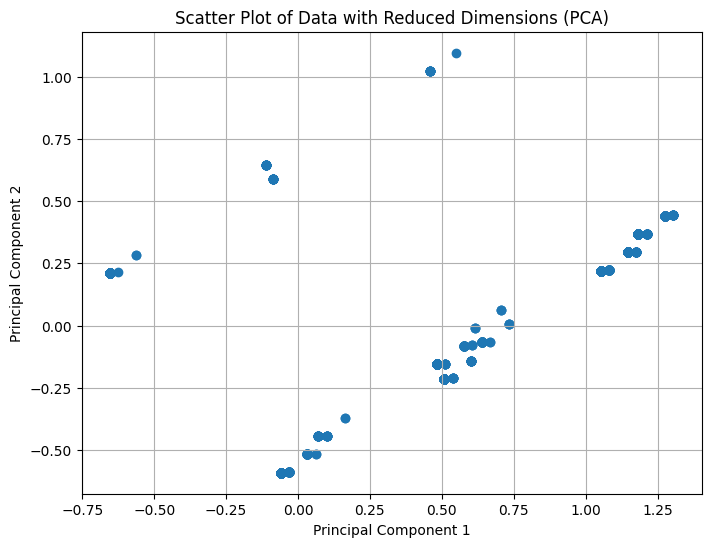

In [8]:
#A1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Loading our dataset
ds = pd.read_csv("shuffled_new.csv")
# Extract the features
X = ds[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Scatter Plot of Data with Reduced Dimensions (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [5]:
#A2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('shuffled_new.csv')
independent_variable = 'malignant'
dependent_variable = 'rude'

X = df[[independent_variable]]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.14


Processing malignant
-------------------------------------

F1 score: 0.8881222276983737

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1630
           1       0.89      0.88      0.89      2039

    accuracy                           0.88      3669
   macro avg       0.87      0.88      0.87      3669
weighted avg       0.88      0.88      0.88      3669


MEAN SQUARED ERROR:
 0.12373943853911147

ROOT MEAN SQ. ERROR:
 0.35176617025960794


	____________________________________________CONFUSION MATRIX___________________________________________



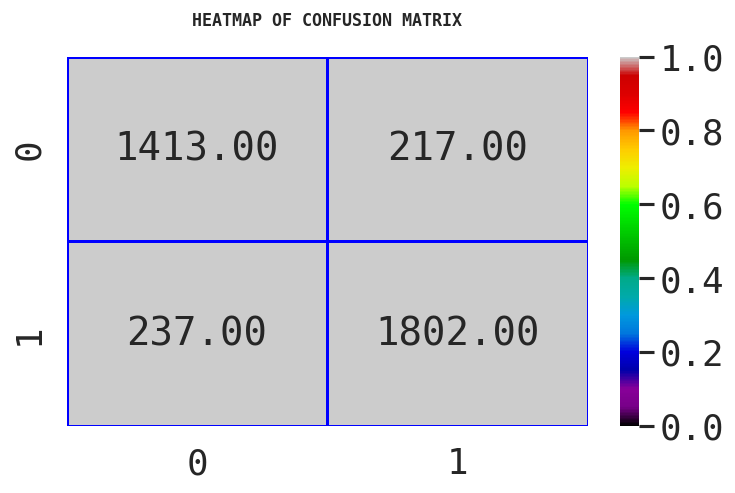



Processing highly_malignant
-------------------------------------

F1 score: 0.15699658703071673

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      3417
           1       0.56      0.09      0.16       252

    accuracy                           0.93      3669
   macro avg       0.75      0.54      0.56      3669
weighted avg       0.91      0.93      0.91      3669


MEAN SQUARED ERROR:
 0.06732079585718179

ROOT MEAN SQ. ERROR:
 0.2594625133948675


	____________________________________________CONFUSION MATRIX___________________________________________



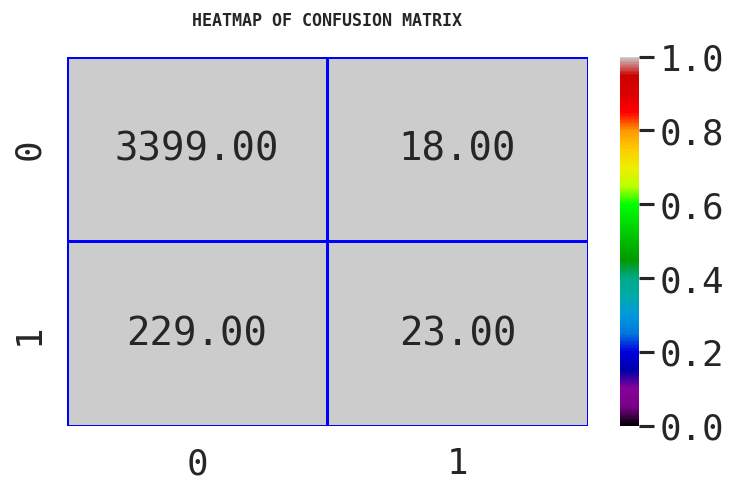



Processing rude
-------------------------------------

F1 score: 0.7502738225629791

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2581
           1       0.93      0.63      0.75      1088

    accuracy                           0.88      3669
   macro avg       0.90      0.80      0.83      3669
weighted avg       0.88      0.88      0.87      3669


MEAN SQUARED ERROR:
 0.12428454619787407

ROOT MEAN SQ. ERROR:
 0.3525401341661316


	____________________________________________CONFUSION MATRIX___________________________________________



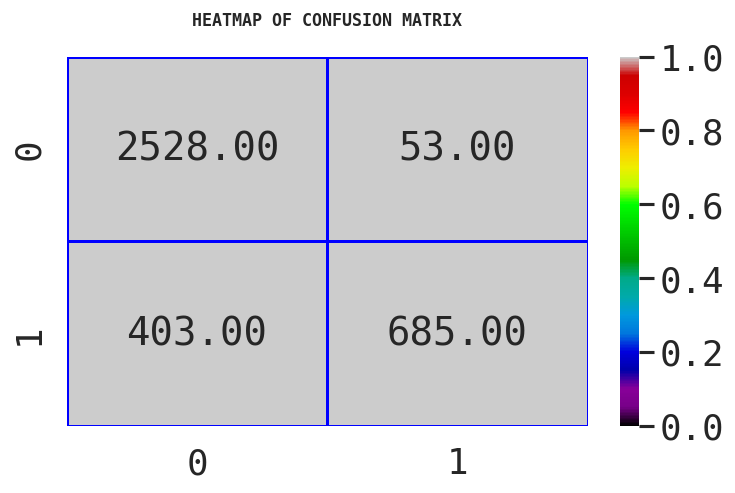



Processing threat
-------------------------------------

F1 score: 0.059701492537313446

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3604
           1       1.00      0.03      0.06        65

    accuracy                           0.98      3669
   macro avg       0.99      0.52      0.53      3669
weighted avg       0.98      0.98      0.97      3669


MEAN SQUARED ERROR:
 0.017170891251022075

ROOT MEAN SQ. ERROR:
 0.13103774742806776


	____________________________________________CONFUSION MATRIX___________________________________________



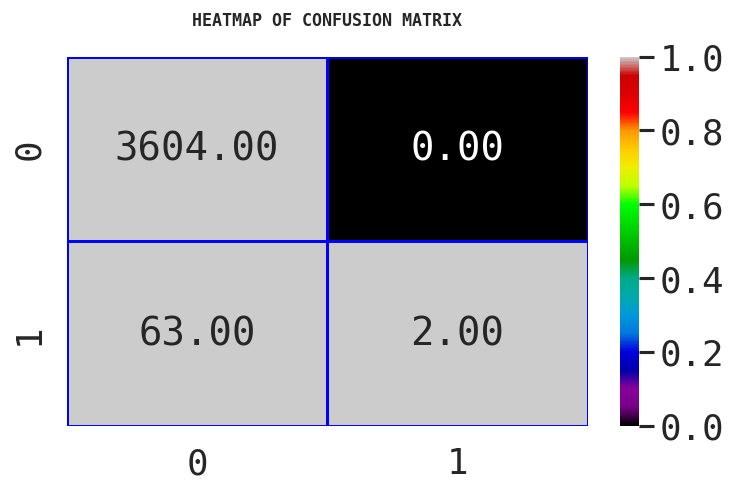



Processing abuse
-------------------------------------


KeyError: ignored

In [17]:
# Logistic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from string import digits as d, punctuation as p
from nltk.tokenize import word_tokenize as wt
from nltk.stem import WordNetLemmatizer as wl, PorterStemmer as porter
from gensim import corpora

from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import accuracy_score,classification_report,f1_score,auc,roc_curve,roc_auc_score,confusion_matrix,log_loss,\
precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

from PIL import Image
import requests
df=data.copy()
df.drop(['id'],axis=1,inplace=True)

X=df.comment_text
y=df.iloc[:,1:-3]

tfidf=tf(input='content', encoding='utf-8', lowercase=True,stop_words='english',max_features=10000,ngram_range=(1,3))
x=tfidf.fit_transform(X).toarray()

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=95)
labels=['malignant','highly_malignant','rude','threat','abuse','loathe','normal']

LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    LogReg_pipeline.fit(x_train, y_train[category])
    pred = LogReg_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)


    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
#creating a dataframe to show the performance of the model

logi_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
logi_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})